In [4]:
import numpy as np
import netCDF4 as nc
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


- 需要注意读取的路径不能有中文的字符
- 目前的问题是用的是cmax，需要重新选择相应的公式  
- 目前已经成功获得了10%均匀采样的数据
- 注意pytho2和python3的区别，除法的结果
- tensor.view里面的-1表示infer的维度

In [2]:
def plot_distribution(data_array: np.array):
    """
    输入二维的array，输出相应的面积图片
    这里人为定义了vmax的数值，之后可能需要改改
    """
    shape = data_array.shape
    x = np.arange(0, shape[1])  # len = 11
    y = np.arange(0, shape[0])  # len = 7

    fig, ax = plt.subplots(dpi=150)
    pcm = ax.pcolormesh(x, y, data_array, vmax=data_array.max(), vmin=0, cmap="Blues")
    fig.colorbar(pcm, ax=ax)


# plot_distribution(O3_con)

## 提取O3的数据

In [3]:
def get_name_lis(basePath):
    '''
    获得数据的名称列表
    '''
    names = os.listdir(basePath)
    return names
basePath = r"D:\大学\大四上\毕业设计-GAN插值-空气质量模型\WorkSpace-thesis\test_cmax_nc\china_camx"
names = get_name_lis(basePath)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\大学\\大四上\\毕业设计-GAN插值-空气质量模型\\WorkSpace-thesis\\test_cmax_nc\\china_camx'

In [4]:
def process_netCDF_get_O3():
    '''获得O3的数据，保存在data_O3_numpy里面'''
    basePath = "china_camx/"
    for name in names:
        path = basePath + name
        file_obj = nc.Dataset(path)
        O3 = file_obj.variables["O3"][:]
        O3_array = np.array([i[0] for i in O3])
    #     print(O3_array.shape)
        np.save("data_O3_numpy/{}.npy".format(name[39:47]), O3_array)   

### 看看经度的左右是否符合要求

In [5]:
path = "china_camx/"+names[200]
print(path)
file_obj = nc.Dataset(path)

china_camx/CAMx.v6.50.China20km_nox_1.00_voc_1.00.20190703.avrg.grd01.nc


In [310]:
lon = file_obj.variables["longitude"][:]
lat = file_obj.variables["latitude"][:]
round(lat.min(),2), round(lat.max(),2)

(15.03, 55.88)

In [293]:
file_obj.variables.keys()

dict_keys(['X', 'Y', 'layer', 'TFLAG', 'ETFLAG', 'longitude', 'latitude', 'topo', 'z', 'NO2', 'SO2', 'O3', 'CO', 'H2O2', 'HNO3', 'PNO3', 'PSO4', 'PNH4', 'POA', 'SOA1', 'SOA2', 'SOA3', 'SOA4', 'SOPA', 'SOPB', 'PEC', 'FPRM', 'FCRS', 'CPRM', 'CCRS'])

In [294]:
name_list = ['PNO3','PSO4','PNH4','POA','SOA1','SOA2',\
             'SOA3','SOA4','SOPA','SOPB','PEC','FPRM','FCRS']

In [295]:
array = np.zeros((24, 1, 216, 270))
for name in name_list:
    print(name)
    array = array + np.array(file_obj.variables[name][:], dtype=float)

PNO3
PSO4
PNH4
POA
SOA1
SOA2
SOA3
SOA4
SOPA
SOPB
PEC
FPRM
FCRS


<ipython-input-298-a4b26dcc9da9>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax.pcolormesh(x, y, data_array, vmax=data_array.max(), vmin=0, cmap='Blues')


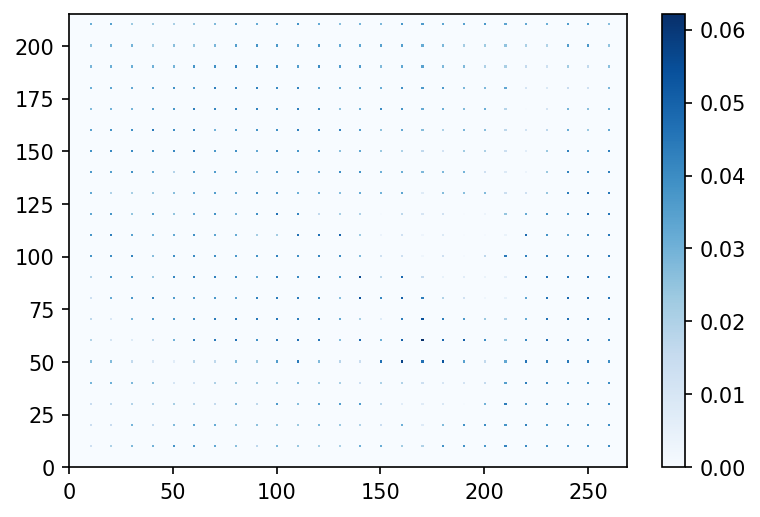

In [311]:
plot_distribution(np.load("data_O3_sample_numpy/20190104-sample.npy")[0])

In [270]:
array.max()

179.42607485841884

In [265]:
file_obj.variables['PNO3'][:] + file_obj.variables['PSO4'][:]

masked_array(
  data=[[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 2.58522181e-09, 3.36226380e-09, ...,
           3.28338672e-08, 5.60596511e-08, 0.00000000e+00],
          [0.00000000e+00, 6.98326375e-09, 2.64681113e-08, ...,
           2.55112820e-08, 4.14938341e-08, 0.00000000e+00],
          ...,
          [0.00000000e+00, 7.17500516e-04, 7.79976021e-04, ...,
           3.32967658e-03, 3.16928793e-03, 0.00000000e+00],
          [0.00000000e+00, 4.95419197e-04, 6.80978468e-04, ...,
           3.38064763e-03, 3.34681477e-03, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]],


        [[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 1.35982337e-08, 5.18216901e-08, ...,
           1.23516401e-07, 9.664913

<ipython-input-298-a4b26dcc9da9>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax.pcolormesh(x, y, data_array, vmax=data_array.max(), vmin=0, cmap='Blues')


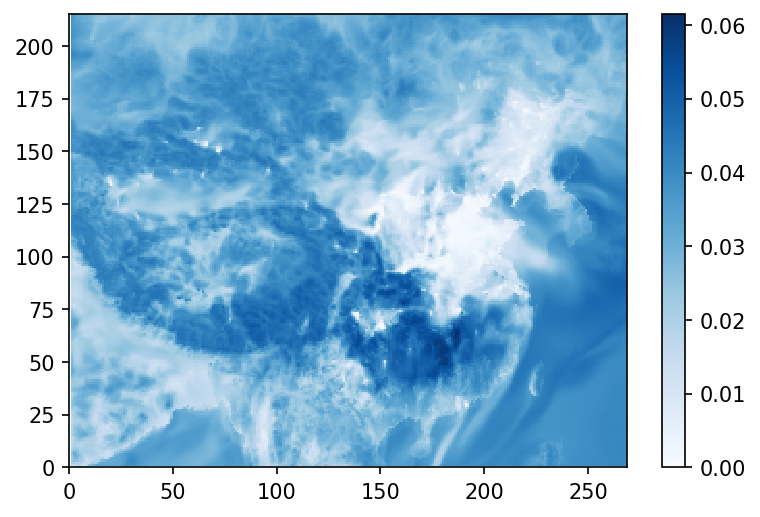

In [306]:
plot_distribution(np.load("data_O3_numpy/20190102.npy")[0])

## 将O3的数据进行采样，获得采样的数据

In [17]:
names_o3 = get_name_lis("data_O3_numpy/")

In [49]:
def get_sample_O3_data():
    '''将数据按照10%进行采样，得到相应的sample的数据，没采样的部分设置为0
    最后一天因为不够24hour，所以函数失败了'''
    xIndex = [i for i in range(0, 216, 10)]
    yIndex = [i for i in range(0, 270, 10)]

    for name in names_o3[:]:
        array_res = np.zeros((24, 216, 270))
        base = "data_O3_numpy/"
        array_24 = np.load(base+name)
        
    #     print(name)
        for hour in range(array_24.shape[0]):
            for x in xIndex:
                for y in yIndex:
                    array_res[hour][x][y] = array_24[hour][x][y]
    #         plot_distribution(array_res[hour])
        np.save("data_O3_sample_numpy/{}-sample.npy".format(name[:name.find(".")]), array_res)

In [50]:
get_sample_O3_data()

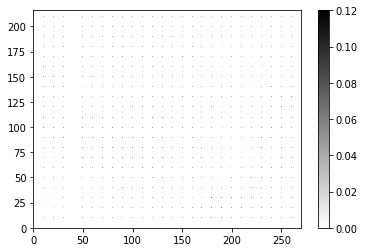

In [53]:
plot_distribution(np.load("data_O3_sample_numpy/20191226-sample.npy")[3])

## 尝试构建模型

In [55]:
import torch
import torch.nn as nn

In [253]:
class Generator(nn.Module):
    def __init__(self, nc, ngf):
        super(Generator,self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(nc,ngf,kernel_size=4,stride=2,padding=1),
                                 nn.BatchNorm2d(ngf),
                                 nn.LeakyReLU(0.2,inplace=True))
        # 16 x 16 x 64
        self.layer2 = nn.Sequential(nn.Conv2d(ngf,ngf*2,kernel_size=4,stride=2,padding=1),
                                 nn.BatchNorm2d(ngf*2),
                                 nn.LeakyReLU(0.2,inplace=True))
        # 8 x 8 x 128
        
        self.layer3 = nn.Sequential(nn.Conv2d(ngf*2,ngf*4,kernel_size=4,stride=2,padding=1),
                                 nn.BatchNorm2d(ngf*4),
                                 nn.LeakyReLU(0.2,inplace=True))
        # 4 x 4 x 256                     
        # 4 x 4 x 256
        self.layer4 = nn.Sequential(nn.ConvTranspose2d(ngf*4,ngf*2,kernel_size=4,stride=2,padding=1),
                                 nn.BatchNorm2d(ngf*2),
                                 nn.ReLU())
        # 8 x 8 x 128
        self.layer5 = nn.Sequential(nn.ConvTranspose2d(ngf*2,ngf,kernel_size=4,stride=2,padding=1),
                                 nn.BatchNorm2d(ngf),
                                 nn.ReLU())
        # 16 x 16 x 64
        self.layer6 = nn.Sequential(nn.ConvTranspose2d(ngf,nc,kernel_size=4,stride=2,padding=1),
                                 nn.Tanh())
        # 32 x 32 x 1
    def forward(self,_cpLayer):
        out = self.layer1(_cpLayer)
        print(out.shape)
        out = self.layer2(out)
        print(out.shape)
        out = self.layer3(out)
        print(out.shape)
        out = self.layer4(out)
        print(out.shape)
        out = self.layer5(out)
        print(out.shape)
        out = self.layer6(out)
        print(out.shape)
        return out
class Discriminator(nn.Module):
    def __init__(self,nc,ndf):
        super(Discriminator,self).__init__()
        self.layer1_image = nn.Sequential(nn.Conv2d(nc,ndf//2,kernel_size=4,stride=2,padding=1),
                                 #nn.BatchNorm2d(ndf/2),
                                 nn.LeakyReLU(0.2,inplace=True))
        # 16 x 16
        self.layer1_cp = nn.Sequential(nn.Conv2d(nc,ndf//2,kernel_size=4,stride=2,padding=1),
                                 #nn.BatchNorm2d(ndf/2),
                                 nn.LeakyReLU(0.2,inplace=True))
        # 16 x 16
        self.layer2 = nn.Sequential(nn.Conv2d(ndf,ndf*2,kernel_size=4,stride=2,padding=1),
                                 nn.BatchNorm2d(ndf*2),
                                 nn.LeakyReLU(0.2,inplace=True))
        # 8 x 8
        
        self.layer3 = nn.Sequential(nn.Conv2d(ndf*2,ndf*4,kernel_size=4,stride=2,padding=1),
                                 nn.BatchNorm2d(ndf*4),
                                 nn.LeakyReLU(0.2,inplace=True))
        # 4 x 4
        
        self.layer4 = nn.Sequential(nn.Conv2d(ndf*4,1,kernel_size=4,stride=1,padding=0),
                                 nn.Sigmoid())
        # 1
#         self.layer5 = nn.Sequential(nn.Linear(, 1),
#                                  nn.Sigmoid())
        
    def forward(self,dem,_cpLayer):
        print(dem.shape)
        out_1 = self.layer1_image(dem)
        print(out_1.shape)
        out_2 = self.layer1_cp(_cpLayer)        
        out = self.layer2(torch.cat((out_1,out_2),1))
        print("concat", out.shape)
        out = self.layer3(out)
        print(out.shape)
        out = self.layer4(out)
        print(out.shape)
#         out = self.layer5(out)
#         print(out.shape)
        return out


In [250]:
tmp = torch.tensor([[1,2,4],[2,5,3]])
tmp, tmp.view(1,-1)

(tensor([[1, 2, 4],
         [2, 5, 3]]),
 tensor([[1, 2, 4, 2, 5, 3]]))

In [251]:
D = Discriminator(1, 32)

In [252]:
# res = G.forward(img)
res = D.forward(img, img)
res.shape

torch.Size([1, 1, 216, 270])
torch.Size([1, 16, 108, 135])
torch.Size([1, 64, 54, 67])
torch.Size([1, 128, 27, 33])
torch.Size([1, 1, 24, 30])


torch.Size([1, 1, 24, 30])

In [239]:
torch.randn(128, 20)[0].shape

torch.Size([20])

In [227]:
G = Generator(1, 64)
G = G.double()

In [236]:
img.view(img.size()[0], -1)

tensor([[0., 0., 0.,  ..., 0., 0., 0.]])

In [232]:
img

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])

In [187]:
arr = np.load("data_O3_sample_numpy/20191226-sample.npy")[3]

In [188]:
arr[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [189]:
arr2 = arr[np.newaxis,np.newaxis,:,:]

In [190]:
arr2.shape

(1, 1, 216, 270)

In [191]:
img = torch.from_numpy(arr2)

In [192]:
img.double()

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])

In [177]:
plot = res.detach().numpy()

In [199]:
res.shape

torch.Size([1, 256, 24, 30])

<ipython-input-182-4bd1457136d2>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax.pcolormesh(x, y, data_array, vmax=data_array.max(), vmin=0, cmap='binary')


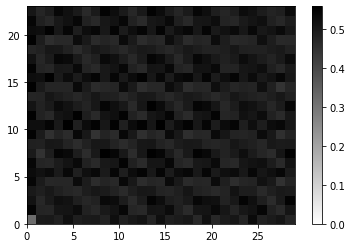

In [183]:
plot_distribution(plot[0][0])